(500, 784)
int64
3


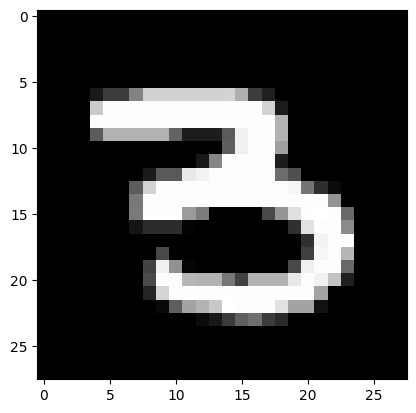

Hu Moment 1: 0.0013091101126899956
Hu Moment 2: 2.7114890485462383e-07
Hu Moment 3: 5.438315845081096e-11
Hu Moment 4: 1.539741630168012e-11
Hu Moment 5: -6.88687961270797e-23
Hu Moment 6: -8.01440265048767e-15
Hu Moment 7: -4.402031209382854e-22


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.neighbors import KNeighborsClassifier
from segmentacion.otsu import thresholding

def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x,y
 
x,y=loadDataset("Nmist/mnist_test.csv",500)

print(x.shape)
print(x.dtype)
digit = x[50]
label = y[50]
print(label)
digit_pixels = digit.reshape(28, 28)

digit_pixels = digit_pixels.astype(np.uint8)

plt.imshow(digit_pixels, cmap='gray')
plt.show()

moments = cv2.moments(digit_pixels)
hu_moments = cv2.HuMoments(moments)

for i in range(7):
    print(f"Hu Moment {i + 1}: {hu_moments[i][0]}")

Hu Moment 1: 0.0013148044161204416
Hu Moment 2: 2.703257366653861e-07
Hu Moment 3: 5.3596737577002077e-11
Hu Moment 4: 1.5465475758096825e-11
Hu Moment 5: -6.11560109059106e-23
Hu Moment 6: -8.033725086786013e-15
Hu Moment 7: -4.410405827130097e-22


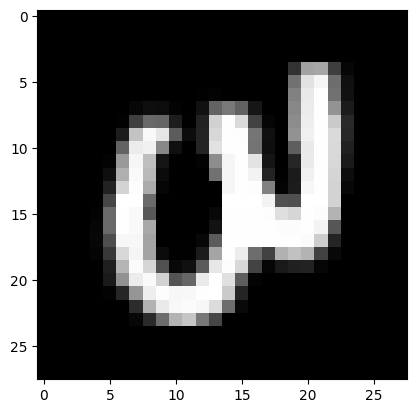

In [2]:
def rotar(imagen, angulo_rotacion):
    alto, ancho = imagen.shape[:2]
    centro = (ancho // 2, alto // 2)
    matriz_rotacion = cv2.getRotationMatrix2D(centro, angulo_rotacion, 1.0)
    imagen_rotada = cv2.warpAffine(imagen, matriz_rotacion, (ancho, alto))
    return imagen_rotada


angulo_rotacion = 268
img = rotar(digit_pixels, angulo_rotacion)

moments = cv2.moments(img)
hu_moments = cv2.HuMoments(moments)

for i in range(7):
    print(f"Hu Moment {i + 1}: {hu_moments[i][0]}")
    
plt.imshow(img, cmap='gray')

Hu Moment 1: 0.0013134181813065026
Hu Moment 2: 2.729136721320283e-07
Hu Moment 3: 5.300719831859318e-11
Hu Moment 4: 1.469571054290937e-11
Hu Moment 5: -6.219070340142905e-23
Hu Moment 6: -7.67509698673846e-15
Hu Moment 7: -4.054177420003665e-22


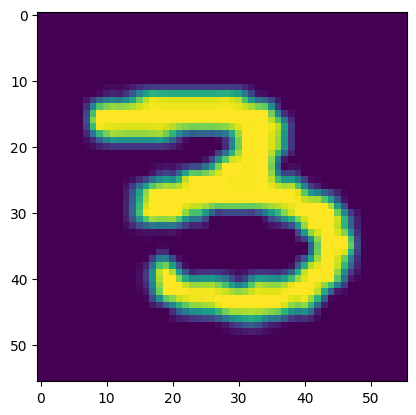

In [3]:
zoom_factor = 2  
height, width = digit_pixels.shape[:2]
# Define the new dimensions
new_height = int(height * zoom_factor)
new_width = int(width * zoom_factor)
# Use OpenCV resize function for zooming
zoomed_image = cv2.resize(digit_pixels, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
plt.imshow( zoomed_image)

moments = cv2.moments(zoomed_image)
hu_moments = cv2.HuMoments(moments)

for i in range(7):
    print(f"Hu Moment {i + 1}: {hu_moments[i][0]}")

In [15]:
import numpy as np

# Función para calcular momentos centrales
def central_moments(image, p, q):
    height, width = image.shape
    m00 = np.sum(image)
    m10 = np.sum(np.array([[x * image[y, x] for x in range(width)] for y in range(height)]))
    m01 = np.sum(np.array([[y * image[y, x] for x in range(width)] for y in range(height)]))
    x_bar = m10 / m00
    y_bar = m01 / m00
    central_moment = np.sum(np.array([[(x - x_bar) ** p * (y - y_bar) ** q * image[y, x] for x in range(width)] for y in range(height)]))
    return central_moment


def calculate_normalized_hu_moments(image):
    # Calcular los momentos centrales
    m00 = central_moments(image, 0, 0)
    m20 = central_moments(image, 2, 0)
    m02 = central_moments(image, 0, 2)
    m11 = central_moments(image, 1, 1)
    m30 = central_moments(image, 3, 0)
    m03 = central_moments(image, 0, 3)
    m12 = central_moments(image, 1, 2)
    m21 = central_moments(image, 2, 1)

    # Normalizar los momentos por m00
    phi1 = m20 / (m00 ** 2) + m02 / (m00 ** 2)
    phi2 = ((m20 / (m00 ** 2)) - (m02 / (m00 ** 2))) ** 2 + (4 * m11 / (m00 ** 2)) ** 2
    phi3 = ((m30 / (m00 ** 2)) - (3 * m12 / (m00 ** 2))) ** 2 + ((3 * m21 / (m00 ** 2)) - (m03 / (m00 ** 2))) ** 2
    phi4 = ((m30 / (m00 ** 2)) + (m12 / (m00 ** 2))) ** 2 + ((m21 / (m00 ** 2)) + (m03 / (m00 ** 2))) ** 2
    phi5 = ((m30 / (m00 ** 2)) - (3 * m12 / (m00 ** 2))) * ((m30 / (m00 ** 2)) + (m12 / (m00 ** 2))) * (((m30 / (m00 ** 2)) + (m12 / (m00 ** 2))) ** 2 - (3 * ((m21 / (m00 ** 2)) + (m03 / (m00 ** 2))) ** 2)) + ((3 * m21 / (m00 ** 2)) - (m03 / (m00 ** 2))) * ((m21 / (m00 ** 2)) + (m03 / (m00 ** 2))) * (3 * (((m30 / (m00 ** 2)) + (m12 / (m00 ** 2))) ** 2) - (((m21 / (m00 ** 2)) + (m03 / (m00 ** 2))) ** 2))
    phi6 = ((m20 / (m00 ** 2)) - (m02 / (m00 ** 2))) * (((m30 / (m00 ** 2)) + (m12 / (m00 ** 2))) ** 2 - (((m21 / (m00 ** 2)) + (m03 / (m00 ** 2))) ** 2)) + (4 * m11 / (m00 ** 2)) * ((m30 / (m00 ** 2)) + (m12 / (m00 ** 2))) * ((m21 / (m00 ** 2)) + (m03 / (m00 ** 2)))
    phi7 = ((3 * m21 / (m00 ** 2)) - (m03 / (m00 ** 2))) * ((m30 / (m00 ** 2)) + (m12 / (m00 ** 2))) * (((m30 / (m00 ** 2)) + (m12 / (m00 ** 2))) ** 2 - (3 * ((m21 / (m00 ** 2)) + (m03 / (m00 ** 2))) ** 2)) - ((m30 / (m00 ** 2)) - (3 * m12 / (m00 ** 2))) * ((m21 / (m00 ** 2)) + (m03 / (m00 ** 2))) * (3 * (((m30 / (m00 ** 2)) + (m12 / (m00 ** 2))) ** 2) - (((m21 / (m00 ** 2)) + (m03 / (m00 ** 2))) ** 2))

    return phi1, phi2, phi3, phi4, phi5, phi6, phi7


def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x,y
 
x,y=loadDataset("Nmist/mnist_test.csv",500)

print(x.shape)
print(x.dtype)
digit = x[1]
label = y[1]

pixels = digit.reshape(28, 28)

pixels = pixels.astype(np.uint8)

phi1, phi2, phi3, phi4, phi5, phi6, phi7 = calculate_normalized_hu_moments(pixels)
print('phi1', phi1)
print('phi2', phi2)
print('phi3', phi3)
print('phi4', phi4)
print('phi5', phi5)
print('phi6', phi6)
print('phi7', phi7)

(500, 784)
int64
phi1 0.003538809596181142
phi2 2.297844495921603e-05
phi3 1.0446816334300818e-05
phi4 9.385713685672073e-06
phi5 9.293682154856691e-11
phi6 3.234667908990894e-08
phi7 -4.511463450545586e-13


phi1 0.0035252148032098854
phi2 2.268218377839311e-05
phi3 1.2153357212944505e-05
phi4 1.0936960543553922e-05
phi5 1.2609050237485005e-10
phi6 3.737288142843396e-08
phi7 -8.861301056574453e-13


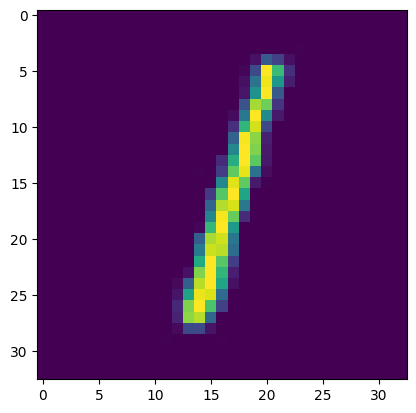

In [16]:
zoom_factor = 1.2
height, width = pixels.shape[:2]
# Define the new dimensions
new_height = int(height * zoom_factor)
new_width = int(width * zoom_factor)
# Use OpenCV resize function for zooming
zoomed = cv2.resize(pixels, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
plt.imshow(zoomed)

phi1, phi2, phi3, phi4, phi5, phi6, phi7 = calculate_normalized_hu_moments(zoomed)
print('phi1', phi1)
print('phi2', phi2)
print('phi3', phi3)
print('phi4', phi4)
print('phi5', phi5)
print('phi6', phi6)
print('phi7', phi7)